In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_tran = pd.read_csv('../dataset/tran.txt',names=['primary-date','time','approximate-indicator','secondary-date','approximate-indicator',
  'transaction-ID','player','type','from-team','from-league',
  'to-team',
  'to-league',
  'draft-type',
  'draft-round',
  'pick-number',
  'info'])
df_playerid = pd.read_csv('../dataset/playerid_list.csv',names=['LASTNAME','FIRSTNAME','PLAYERID','DAVENPORTCODE','MLBCODE','player'],skiprows=1);
df_master = pd.read_csv('../dataset/Master.csv')
df_batstat = pd.read_csv('../dataset/war_daily_bat.txt')
df_pitchstat = pd.read_csv('../dataset/war_daily_pitch.txt')

/home/piyush/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:

df_master['player_ID'] = df_master['bbrefID']
df_master.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,player_ID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,abadan01


In [4]:
grouped_trans = df_tran.groupby('transaction-ID')
#grouped_trans.get_group(75135)
#df_tran[(df_tran['player'] == 'knebc001')]

In [5]:
from IPython.display import display
pd.set_option('display.max_columns', 60)
df_pitchstat.head()

,name_common,age,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,G,GS,IPouts,IPouts_start,IPouts_relief,RA,xRA,xRA_sprp_adj,xRA_def_pitcher,PPF,PPF_custom,xRA_final,BIP,BIP_perc,RS_def_total,runs_above_avg,runs_above_avg_adj,runs_above_rep,RpO_replacement,GR_leverage_index_avg,WAR,salary,teamRpG,oppRpG,pyth_exponent,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep,ERA_plus,ER_lg
0,David Aardsma,22.0,430911.0,aardsda01,2004,SFG,1,NL,11,0,32,0.0,32.0,8,5.949,-0.436,-0.437,101,99.246,5.905,44,0.0093,-47.0,-2.095,-2.165,-1.156,0.203,1.0718,-0.15,300000.0,4.67092,4.86773,1.902,0.4804,-0.2156,-0.0298,4.75633,1.895,0.4914,0.0942,66.675000,5.334
1,David Aardsma,24.0,430911.0,aardsda01,2006,CHC,1,NL,45,0,159,0.0,159.0,25,28.172,-2.065,-0.404,103,104.018,27.576,147,0.0337,-12.0,2.576,2.718,7.438,0.211,0.7540,0.61,NaN,4.86675,4.80635,1.909,0.5060,0.2700,-0.1312,4.97303,1.919,0.4896,0.4682,114.295833,27.431
2,David Aardsma,25.0,430911.0,aardsda01,2007,CHW,1,AL,25,0,97,0.0,97.0,24,17.999,-1.332,-1.380,104,103.205,18.625,97,0.0206,-67.0,-5.375,-5.651,-1.748,0.218,1.4268,-0.40,387500.0,4.85895,5.08499,1.924,0.4781,-0.5475,-0.1997,5.00394,1.920,0.4859,0.3459,74.086956,17.040
3,David Aardsma,26.0,430911.0,aardsda01,2008,BOS,1,AL,47,0,146,0.0,146.0,32,26.013,-1.922,0.666,106,106.921,25.046,139,0.0317,21.0,-6.954,-7.857,-1.669,0.211,0.7970,-0.32,403250.0,4.70400,4.87117,1.904,0.4834,-0.7802,-0.0636,4.81624,1.901,0.4888,0.5205,83.796667,25.139
4,David Aardsma,27.0,430911.0,aardsda01,2009,SEA,1,AL,73,0,214,0.0,214.0,23,39.099,-2.878,3.032,96,94.973,31.521,181,0.0399,76.0,8.521,7.885,16.422,0.215,1.8921,1.72,419000.0,4.79788,4.68987,1.899,0.5108,0.7884,0.1671,4.90529,1.911,0.4894,0.7666,168.910000,33.782


In [6]:
df_merge = pd.merge(df_batstat,df_master[['player_ID','retroID']],on='player_ID',how='inner')

In [7]:
df_merge.head()

,name_common,age,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,PA,G,Inn,runs_bat,runs_br,runs_dp,runs_field,runs_infield,runs_outfield,runs_catcher,runs_good_plays,runs_defense,runs_position,runs_position_p,runs_replacement,runs_above_rep,runs_above_avg,runs_above_avg_off,runs_above_avg_def,WAA,WAA_off,WAA_def,WAR,WAR_def,WAR_off,WAR_rep,salary,pitcher,teamRpG,oppRpG,oppRpPA_rep,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,OPS_plus,TOB_lg,TB_lg,retroID
0,David Aardsma,22.0,430911.0,aardsda01,2004,SFG,1,NL,0,11,10.7,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.00,0.0,0.1,0.1,0.1,0.1,0.01,0.01,0.00,0.01,0.00,0.01,0.0,300000.0,Y,4.67546,4.67092,0.08651,4.67092,1.891,1.890,0.5005,0.5005,0.5005,0.5000,NaN,0.000,0.000,aardd001
1,David Aardsma,24.0,430911.0,aardsda01,2006,CHC,1,NL,3,45,53.0,-0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.21,0.46,0.0,-0.2,-0.2,-0.2,0.2,-0.02,-0.02,0.00,-0.02,0.00,-0.02,0.0,NaN,Y,4.86164,4.86675,0.09085,4.86467,1.912,1.913,0.4995,0.4995,0.5005,0.4998,-100.0,0.694,0.896,aardd001
2,David Aardsma,25.0,430911.0,aardsda01,2007,CHW,1,AL,0,25,32.3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11,0.00,0.0,0.1,0.1,0.1,0.1,0.01,0.01,0.02,0.01,0.02,0.01,0.0,387500.0,Y,4.86335,4.85895,0.08422,4.85895,1.912,1.912,0.5004,0.5004,0.5004,0.5000,NaN,0.000,0.000,aardd001
3,David Aardsma,26.0,430911.0,aardsda01,2008,BOS,1,AL,1,47,48.7,-0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22,0.14,0.0,0.1,0.1,0.1,0.2,0.00,0.00,0.05,0.00,0.05,0.00,0.0,403250.0,Y,4.70549,4.70400,0.08092,4.70321,1.894,1.894,0.5001,0.5001,0.5005,0.4999,-100.0,0.345,0.434,aardd001
4,David Aardsma,27.0,430911.0,aardsda01,2009,SEA,1,AL,0,73,71.3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.3,0.3,0.3,0.3,0.03,0.03,0.06,0.03,0.06,0.03,0.0,419000.0,Y,4.80227,4.79788,0.08302,4.79788,1.905,1.905,0.5004,0.5004,0.5004,0.5000,NaN,0.000,0.000,aardd001


In [8]:
pd.set_option('display.max_columns', 60)
df_batstat.head()

,name_common,age,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,PA,G,Inn,runs_bat,runs_br,runs_dp,runs_field,runs_infield,runs_outfield,runs_catcher,runs_good_plays,runs_defense,runs_position,runs_position_p,runs_replacement,runs_above_rep,runs_above_avg,runs_above_avg_off,runs_above_avg_def,WAA,WAA_off,WAA_def,WAR,WAR_def,WAR_off,WAR_rep,salary,pitcher,teamRpG,oppRpG,oppRpPA_rep,oppRpG_rep,pyth_exponent,pyth_exponent_rep,waa_win_perc,waa_win_perc_off,waa_win_perc_def,waa_win_perc_rep,OPS_plus,TOB_lg,TB_lg
0,David Aardsma,22.0,430911.0,aardsda01,2004,SFG,1,NL,0,11,10.7,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.00,0.0,0.1,0.1,0.1,0.1,0.01,0.01,0.00,0.01,0.00,0.01,0.0,300000.0,Y,4.67546,4.67092,0.08651,4.67092,1.891,1.890,0.5005,0.5005,0.5005,0.5000,NaN,0.000,0.000
1,David Aardsma,24.0,430911.0,aardsda01,2006,CHC,1,NL,3,45,53.0,-0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.21,0.46,0.0,-0.2,-0.2,-0.2,0.2,-0.02,-0.02,0.00,-0.02,0.00,-0.02,0.0,NaN,Y,4.86164,4.86675,0.09085,4.86467,1.912,1.913,0.4995,0.4995,0.5005,0.4998,-100.0,0.694,0.896
2,David Aardsma,25.0,430911.0,aardsda01,2007,CHW,1,AL,0,25,32.3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11,0.00,0.0,0.1,0.1,0.1,0.1,0.01,0.01,0.02,0.01,0.02,0.01,0.0,387500.0,Y,4.86335,4.85895,0.08422,4.85895,1.912,1.912,0.5004,0.5004,0.5004,0.5000,NaN,0.000,0.000
3,David Aardsma,26.0,430911.0,aardsda01,2008,BOS,1,AL,1,47,48.7,-0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22,0.14,0.0,0.1,0.1,0.1,0.2,0.00,0.00,0.05,0.00,0.05,0.00,0.0,403250.0,Y,4.70549,4.70400,0.08092,4.70321,1.894,1.894,0.5001,0.5001,0.5005,0.4999,-100.0,0.345,0.434
4,David Aardsma,27.0,430911.0,aardsda01,2009,SEA,1,AL,0,73,71.3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.3,0.3,0.3,0.3,0.03,0.03,0.06,0.03,0.06,0.03,0.0,419000.0,Y,4.80227,4.79788,0.08302,4.79788,1.905,1.905,0.5004,0.5004,0.5004,0.5000,NaN,0.000,0.000


In [9]:
df_tran = df_tran[df_tran['type'] == "T "]
df_tran = df_tran[df_tran['to-league'].isin(['AL','NL'])]
df_tran = df_tran[df_tran['from-league'].isin(['AL','NL'])]

In [10]:
df_tran.head()

,primary-date,time,approximate-indicator,secondary-date,approximate-indicator,transaction-ID,player,type,from-team,from-league,to-team,to-league,draft-type,draft-round,pick-number,info
32372,19681210,NaN,NaN,NaN,NaN,72232,marel101,T,DET,AL,HOU,NL,NaN,NaN,NaN,NaN
32373,19670817,NaN,NaN,NaN,NaN,72232,mathe101,T,HOU,NL,DET,AL,NaN,NaN,NaN,NaN
32374,19671122,NaN,NaN,NaN,NaN,72232,gladf102,T,DET,AL,HOU,NL,NaN,NaN,NaN,NaN
50583,19640000,NaN,NaN,NaN,NaN,72241,steem101,T,CHN,NL,PHI,NL,NaN,NaN,NaN,NaN
50584,19640000,NaN,NaN,NaN,NaN,72241,Robert Baillargeon,T,PHI,NL,CHN,NL,NaN,NaN,NaN,NaN


In [85]:
#Calculates the absolute difference between two sides of a trade by summing the WAR values of each player on each side
def trade_value(tranID):
    td = df_tran[(df_tran['transaction-ID'] == tranID)]
    teams = td['from-team'].unique()
    val = 0
    player_vals = []
    for x in teams:
        for index, row in td.iterrows():
            val = 0
            if (row['from-team'] == x):
                player_df = df_merge[(df_merge['retroID'] == row['player'])]
                #this need to change as per year from the player db, just taking 1st instance for now
                val += player_df.head(n=1)['WAR'] 
                if len(val)>=1:
                    temp = val.item()
                else:
                    temp = 0
        player_vals.append(temp)
    return abs(player_vals[1]-player_vals[0])

#Making a list of the above function returns for each transaction to plot it in next cell
trade_val_list = []
transactions = df_tran['transaction-ID'].unique()
for x in transactions:
    trade_val_list.append(trade_value(x))


<function matplotlib.pyplot.show>

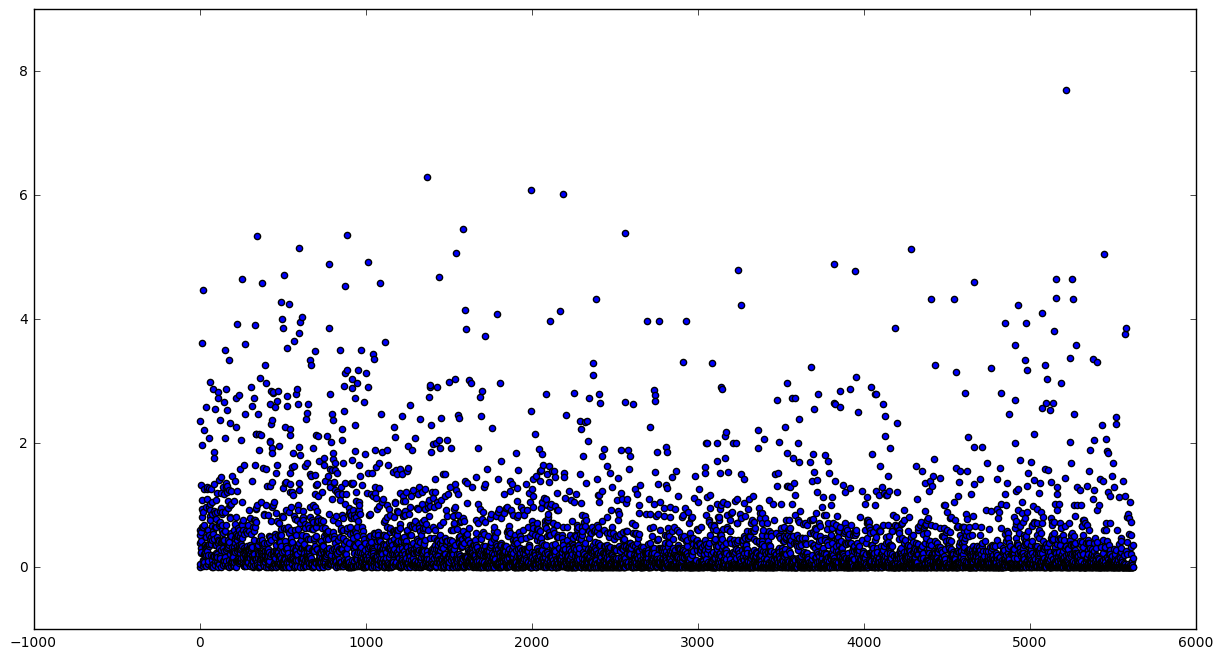

In [92]:
#trade_val_list
x_pos = np.arange(0,len(trade_val_list))
plt.figure(figsize=(15, 8))
plt.scatter(x_pos, trade_val_list)
plt.show

In [14]:
df_tran['transaction-ID'].nunique()

5622

In [15]:
import networkx as nx
import operator
G =nx.Graph()
for index, row in df_tran.iterrows():
    G.add_edge(row['from-team'] ,row['to-team']) 

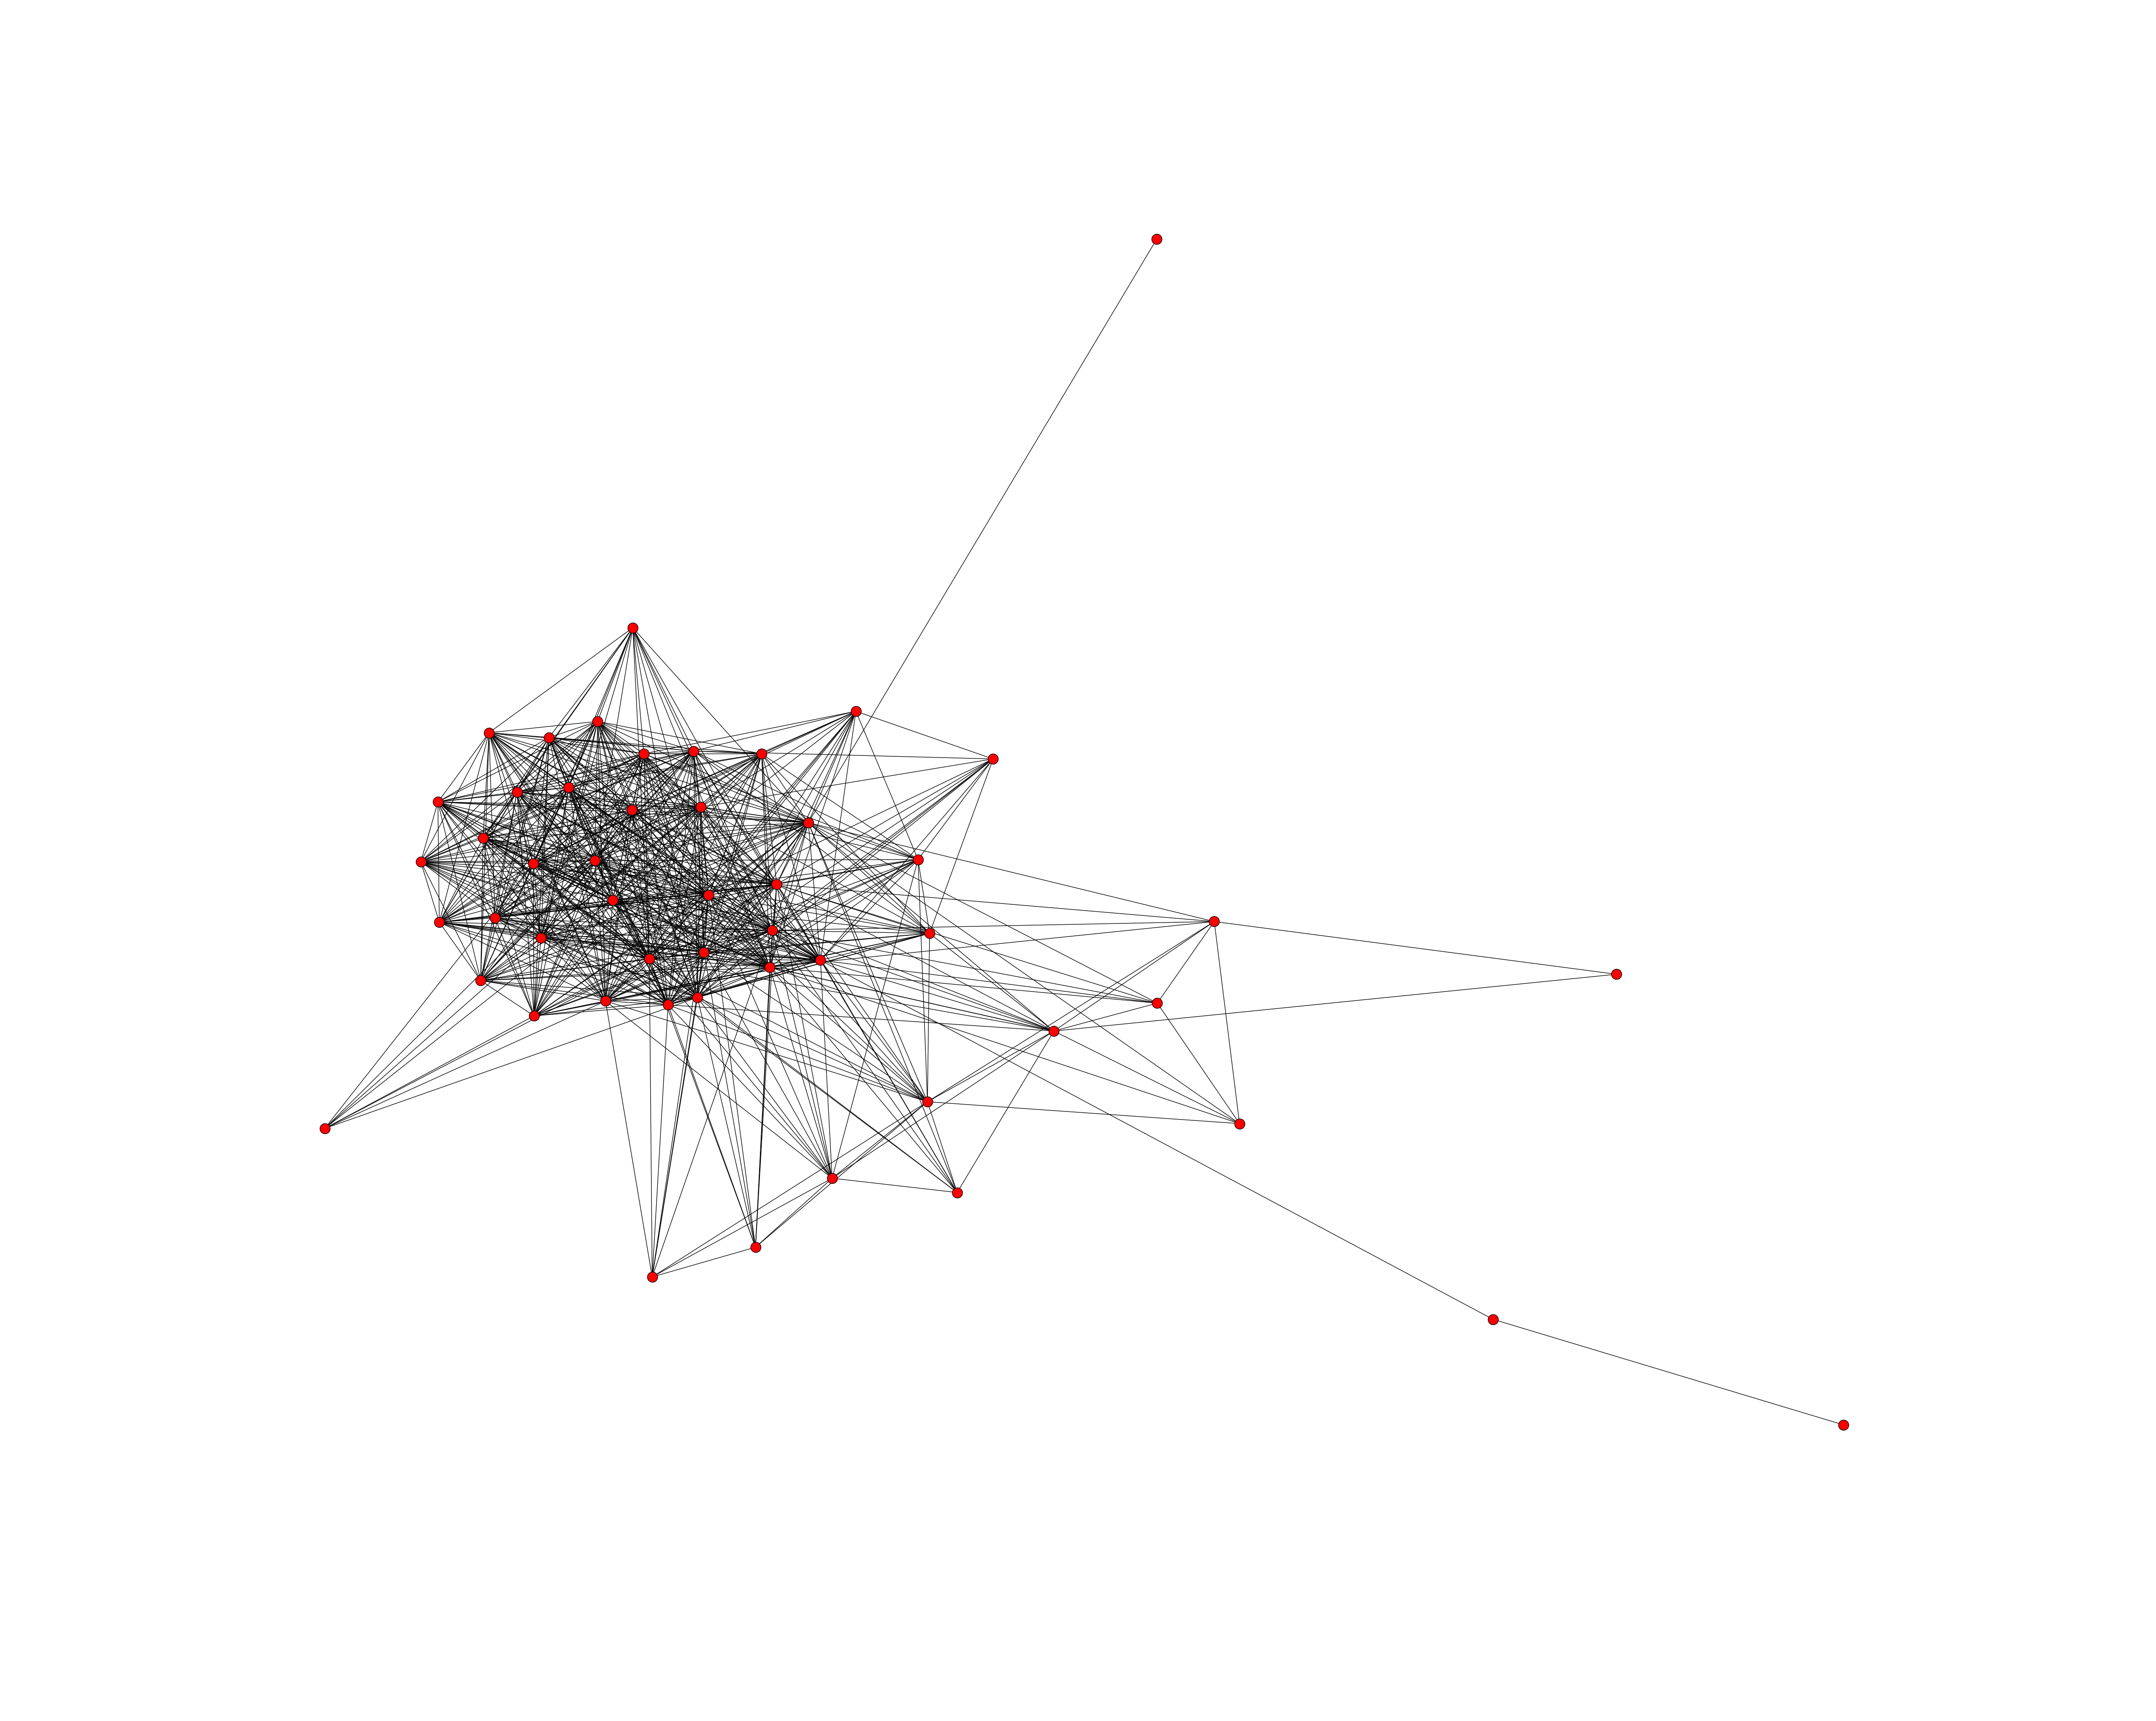

In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
fig = plt.figure (figsize=(50,40))
nx.draw(G,pos=nx.spring_layout(G))
plt.savefig('graph.png')

In [17]:
df_tran_ANL = df_tran[(df_tran['to-league'] == 'AL') & (df_tran['from-league'] == 'AL')]
df_tran_ANL['transaction-ID'].nunique()

1518

In [18]:
df_tran_ANL = df_tran[(df_tran['to-league'] == 'NL') & (df_tran['from-league'] == 'NL')]
df_tran_ANL['transaction-ID'].nunique()

1789

In [19]:
df_tran_ANL = df_tran[(df_tran['to-league'] == 'AL') & (df_tran['from-league'] == 'NL')]
df_tran_ANL['transaction-ID'].nunique()

2346

In [20]:
df_tran_ANL = df_tran[(df_tran['to-league'] == 'NL') & (df_tran['from-league'] == 'AL')]
df_tran_ANL['transaction-ID'].nunique()

2348

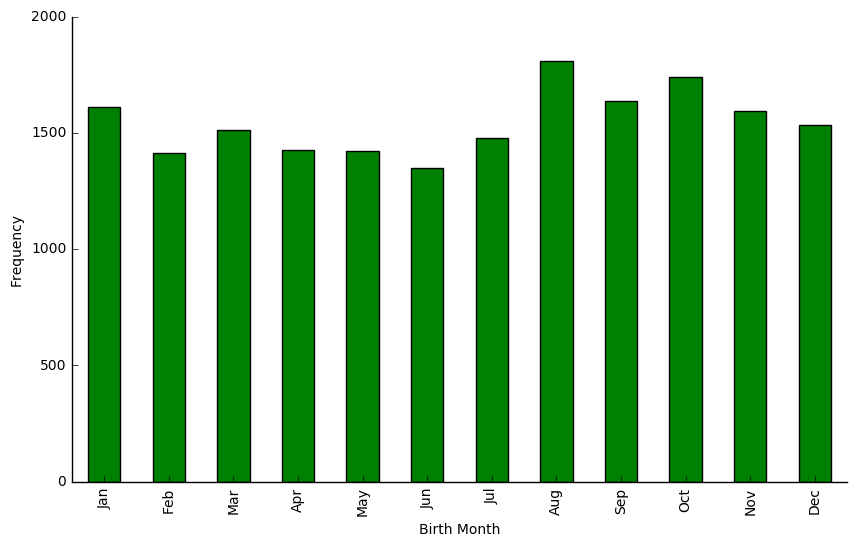

In [21]:
# Birthday Skew
fig = plt.figure(figsize=(10, 6))
 
ax = plt.subplot(111) 

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()   
numBins = 50
x = df_master['birthMonth']
x = x.dropna()

plt.xlabel("Birth Month")
plt.ylabel("Frequency")

order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
x = x.apply(lambda x : order[int(x)-1])

# Draw the bar chart
x.value_counts().ix[order].plot(ax=ax, kind='bar',color='green')
plt.savefig('birth.png')
plt.show()

In [22]:
# month where most transactions take place
df_tran['primary-date'] = pd.to_datetime(df_tran['primary-date'], format='%Y%m%d',errors = 'coerce')
df_ttime = df_tran['primary-date']
df_ttime = df_ttime.dropna()
df_ttime= df_ttime.apply(lambda x : x.strftime('%b'))

fig = plt.figure(figsize=(10, 6))
 
ax = plt.subplot(111) 

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()   

plt.xlabel("Month")
plt.ylabel("Frequency")



order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']

# Draw the bar chart
df_ttime.value_counts().ix[order].plot(ax=ax, kind='bar',color='#3F5D7D')
#ax.hist(df_ttime,numBins,color='green')
plt.savefig('trans.png')
plt.show()

ValueError: year=1886 is before 1900; the datetime strftime() methods require year >= 1900

In [ ]:
# age at which player gets traded
df_master_year = df_master[['birthYear','retroID']]
df_master_year=  df_master_year.rename(columns = {'retroID':'player'})
df_master_year = df_master_year.dropna()
df_tran['tranYear'] = df_tran['primary-date'].apply(lambda x : x.year)
df_merged = pd.merge(df_tran,df_master_year,on='player',how='inner')
df_merged['Difference'] = df_merged['tranYear'].sub(df_merged['birthYear'], axis=0)

In [ ]:
fig = plt.figure(figsize=(15, 6))
 
ax = plt.subplot(111) 

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()   

x = df_merged['Difference']
x = x.dropna()
numBins = int(max(x) - min(x))
x = x.apply(lambda x : int(x))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(range(0,50))
ax.hist(x,numBins,color='#377eb8',alpha=0.8)
plt.savefig('age.png')
plt.show()

In [ ]:
# effect of experience on trade veterens vs prospects
df_master_dyear = df_master[['debut','retroID']]
df_master_dyear=df_master_dyear.rename(columns = {'retroID':'player'})
df_master_dyear = df_master_dyear.dropna()
df_master_dyear['debut'] = pd.to_datetime(df_master_dyear['debut'], format='%Y-%m-%d',errors = 'coerce')
df_master_dyear['debut'] = df_master_dyear['debut'].apply(lambda x : x.year)
df_merged = pd.merge(df_tran,df_master_dyear,on='player',how='inner')
df_merged['Difference'] = df_merged['tranYear'].sub(df_merged['debut'], axis=0)

In [ ]:
fig = plt.figure(figsize=(16, 6))
 
ax = plt.subplot(111) 

ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()   

x = df_merged['Difference']
x = x.dropna()
numBins = int(max(x) - min(x))
x = x.apply(lambda x : int(x))
plt.xlabel("Experience in years")
plt.ylabel("Frequency")
plt.xticks(range(-7,28))
ax.hist(x,numBins,color='#e41a1c',alpha=0.8, range=[-5, 20])
plt.savefig('exp.png')
plt.show()